In [1]:
from Mapper import GazeboWaterTankMapper, GoalStatus
from GridBasedPlanner import GridBasedPlanner

In [2]:
# world files with goals for sample plan visualization: by_small_1.sdf, by_small_2.sdf, by_small_3.sdf
mapper = GazeboWaterTankMapper(world_path='worlds/by_small_1.sdf', init=True)
planner = GridBasedPlanner(mapper, last_tank_position=(0.0, -9.5, 0.0))

Initializing map
Parsing Gazebo World file...	V
Calculating z max...	V
Creating 3D grid...	V
Adding floor to grid...	V
Adding all world elements to the grid	V
Creating 2D occupancy map...	V
Adding buffer zone around obstacles...	V
Initialized.


In [3]:
# build the plan: find firing trajectories and poits to fire from
_ = planner.find_firing_trajectories(goal_status=GoalStatus.NEW)

Trajectory found for (6.0, -6.0, 0.1856)!
Trajectory found for (-8.0, -4.5, 0.1856)!
Trajectory found for (-6.0, 2.5, 0.263)!
Trajectory found for (5.25, 6.0, 1.089)!
Trajectory found for (-6.5, 6.5, 1.686)!
Took:16.68860936164856


In [4]:
# find driving plan to drive to all the firing points
planner.find_driving_plan(goal_status=GoalStatus.NEW)

Path found for goal ('cat_goal_4_1', (4.0, -6.24, 0.11))!
Path found for goal ('cat_goal_2_0', (3.32, -2.76, 0.11))!
Path found for goal ('cat_goal_1_0', (-5.16, -1.48, 0.11))!
Path found for goal ('cat_goal_3_0', (-3.96, -7.24, 0.11))!
Path found for goal ('cat_goal_4_0', (-6.92, -9.4, 0.11))!


In [8]:
# Build the final plan - a queue of commands for the robot
planner.build_plan()
list(planner.plan.queue)

[{'type': 'drive',
  'params': {'goal_id': 'cat_goal_4_1', 'x': 3.2, 'y': -4.96, 'theta': 0}},
 {'type': 'drive',
  'params': {'goal_id': 'cat_goal_4_1', 'x': 3.32, 'y': -4.84, 'theta': 0}},
 {'type': 'drive',
  'params': {'goal_id': 'cat_goal_4_1', 'x': 7.04, 'y': -4.84, 'theta': 0}},
 {'type': 'drive',
  'params': {'goal_id': 'cat_goal_4_1', 'x': 7.16, 'y': -4.96, 'theta': 0}},
 {'type': 'drive',
  'params': {'goal_id': 'cat_goal_4_1', 'x': 7.16, 'y': -7.08, 'theta': 0}},
 {'type': 'drive',
  'params': {'goal_id': 'cat_goal_4_1', 'x': 7.04, 'y': -7.2, 'theta': 0}},
 {'type': 'drive',
  'params': {'goal_id': 'cat_goal_4_1', 'x': 4.92, 'y': -7.2, 'theta': 0}},
 {'type': 'drive',
  'params': {'goal_id': 'cat_goal_4_1', 'x': 4.0, 'y': -6.28, 'theta': 0}},
 {'type': 'aim', 'params': {'pitch': 0.7854, 'yaw': 0.1194, 'relative': 0}},
 {'type': 'shoot',
  'params': {'goal_id': 'cat_goal_4_1',
   'v0': 4.2988,
   't': 0.4273,
   'pitch': 0.7854,
   'goal_position': (6.0, -6.0, 0.0)}},
 {'type

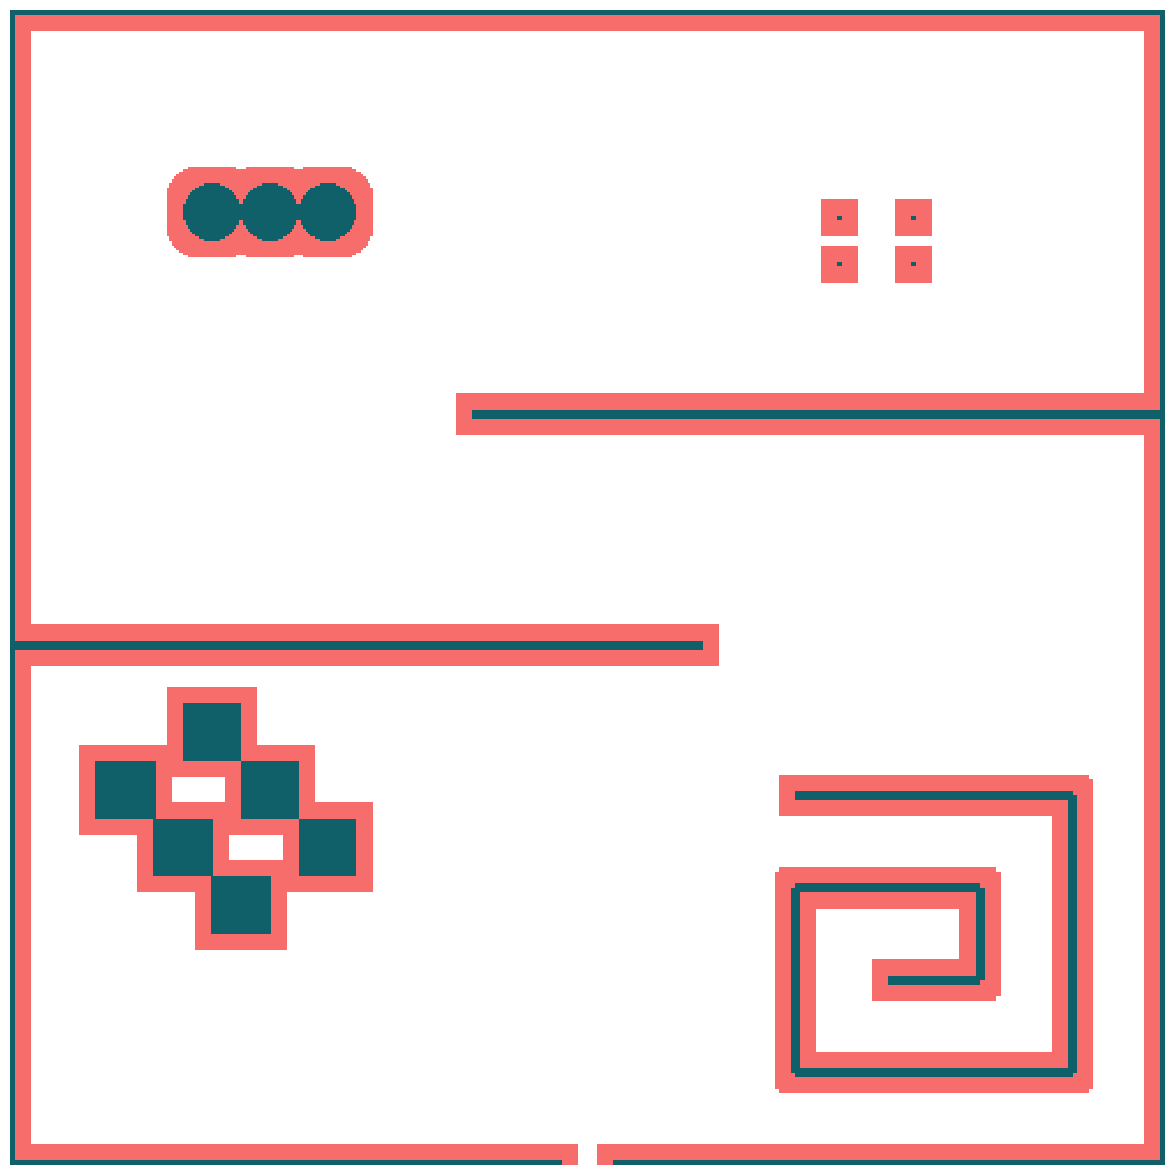

In [5]:
# visualize the world obstacle map (red is buffer zone according to tank gabarits)
mapper.visualize_2d_map(mapper.map_2d_buffered)

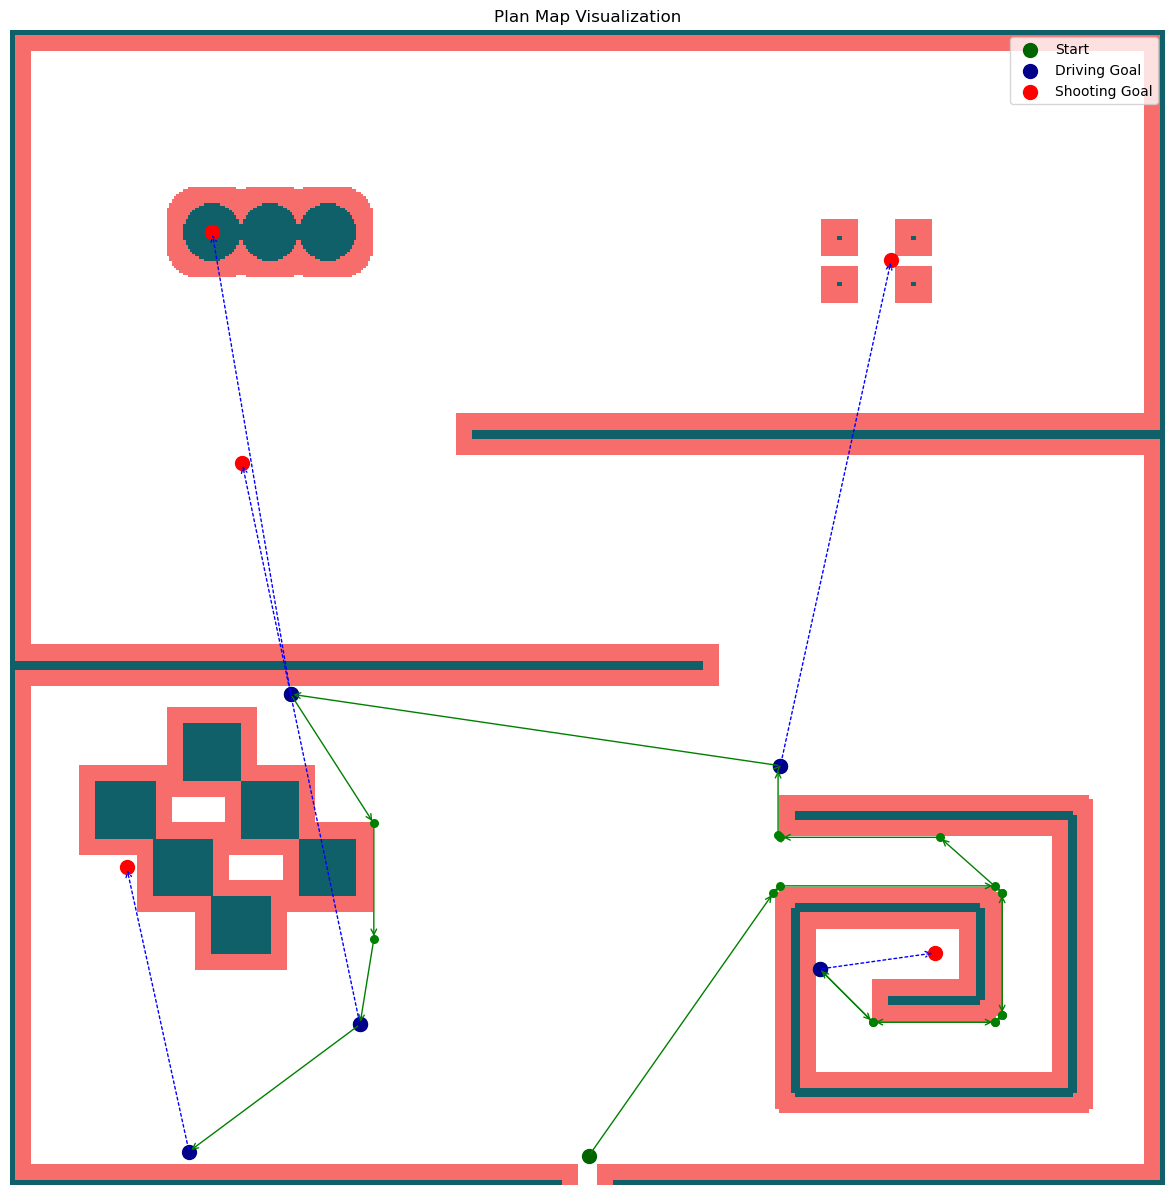

In [6]:
# visualize the final plan
planner.visualize_plan(show=True, save=False, goal_status=GoalStatus.NEW)

In [9]:
# add the plan (firing trajectories and driving paths) to the 3D grid (grid that is used for calculation and visualization)
for data in planner.shooting_data.values():
    mapper.add_trajectory_to_grid(data["trajectory"])
mapper.add_paths_to_grid(planner.paths_grid)
# you can also add the circles that vere made to find the firing trajectories for each goal
# for circle_points in planner.circles_points:
#     mapper.add_circle_to_grid(circle_points)

In [10]:
# visualize the 3d map with the final plan
# green - obstacles, red - goals, lightgreen - paths, rose - obstacles buffer, blue - firing balistic trajectories
mapper.visualize_grid_with_pyvista()

Adding ('floor', 10)...
Adding ('box', 255)...
Adding ('cylinder', 255)...
Adding ('goal', 5)...
Adding ('point', 6)...
Adding ('buffer', 7)...
Adding ('path', 9)...
Adding ('node', 11)...
Plotting...


Widget(value='<iframe src="http://localhost:52803/index.html?ui=P_0x27a4b252060_0&reconnect=auto" class="pyvis…